In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os

plt.rcParams.update({
    "text.usetex":True,
    "font.family":"serif",
})

In [2]:
xlabel_kwargs = {'fontsize':15}
ylabel_kwargs = {'fontsize':15}
legend_kwargs = {'fontsize':12}
title_kwargs = {'fontsize':18}
xticks_kwargs = {'fontsize':12}
yticks_kwargs = {'fontsize':12}

In [3]:
cwd = os.getcwd()

gru_dname_list = [
    # cwd + '/saved_AR_AERNN_rnn/AR_rnn_{:03d}'.format(i) for i in range(2, 6)
    cwd + '/saved_AR_AERNN_rnn/AR_rnn_002',
    cwd + '/saved_AR_AERNN_rnn/AR_rnn_006',
    cwd + '/saved_AR_AERNN_rnn/AR_rnn_007',
    cwd + '/saved_AR_AEESN_rnn/AR_ESN_ensemble_005',
    cwd + '/saved_pod_galerkin/podGalerkin_003',
]

print('gru_dname : ', gru_dname_list)

gru_dname :  ['/home/rkaushik/Documents/Thesis/MLROM/new_cdv/saved_AR_AERNN_rnn/AR_rnn_002', '/home/rkaushik/Documents/Thesis/MLROM/new_cdv/saved_AR_AERNN_rnn/AR_rnn_006', '/home/rkaushik/Documents/Thesis/MLROM/new_cdv/saved_AR_AERNN_rnn/AR_rnn_007', '/home/rkaushik/Documents/Thesis/MLROM/new_cdv/saved_AR_AEESN_rnn/AR_ESN_ensemble_005', '/home/rkaushik/Documents/Thesis/MLROM/new_cdv/saved_pod_galerkin/podGalerkin_003']


In [4]:
plot_dir = cwd + '/study-03/plots'

if not os.path.exists(plot_dir):
    os.makedirs(plot_dir)

In [5]:
gru_ph_list_global = []
gru_numoutsteps_global = []
for gru_dname in gru_dname_list:
    gru_ph_list = []
    gru_numoutsteps = []
    for fname in os.listdir(gru_dname):
        if fname.endswith('.npz') and fname.startswith('prediction_horizons-testingdata'):
            if fname.startswith('prediction_horizons-testingdata--latent'):
                pass
            else:
                gru_ph_list.append(gru_dname + '/' + fname)
                fname = fname[0:-4]
                fname = fname[::-1]
                idx = fname.find('--')
                fname = fname[8:idx]
                fname = fname[::-1]
                try:
                    gru_numoutsteps.append(int(fname))
                except:
                    gru_numoutsteps.append(0)
    #             if fname == 'ZERO':
    #                 gru_numoutsteps.append(0)
    #             else:
    #                 gru_numoutsteps.append(int(fname))

    print(gru_ph_list)
    print(gru_numoutsteps)

    gru_ph_list = np.array(gru_ph_list)
    gru_numoutsteps = np.array(gru_numoutsteps)

    sort_idx = np.argsort(gru_numoutsteps)
    gru_numoutsteps = gru_numoutsteps[sort_idx]
    gru_ph_list = gru_ph_list[sort_idx]

    print('')
    print(gru_ph_list)
    print(gru_numoutsteps)
    
    gru_ph_list_global.append(gru_ph_list)
    gru_numoutsteps_global.append(gru_numoutsteps)
    
    print('\n\n\n')

['/home/rkaushik/Documents/Thesis/MLROM/new_cdv/saved_AR_AERNN_rnn/AR_rnn_002/prediction_horizons-testingdata--20outsteps.npz', '/home/rkaushik/Documents/Thesis/MLROM/new_cdv/saved_AR_AERNN_rnn/AR_rnn_002/prediction_horizons-testingdata--ZEROoutsteps.npz', '/home/rkaushik/Documents/Thesis/MLROM/new_cdv/saved_AR_AERNN_rnn/AR_rnn_002/prediction_horizons-testingdata--10outsteps.npz', '/home/rkaushik/Documents/Thesis/MLROM/new_cdv/saved_AR_AERNN_rnn/AR_rnn_002/prediction_horizons-testingdata--60outsteps.npz', '/home/rkaushik/Documents/Thesis/MLROM/new_cdv/saved_AR_AERNN_rnn/AR_rnn_002/prediction_horizons-testingdata--40outsteps.npz']
[20, 0, 10, 60, 40]

['/home/rkaushik/Documents/Thesis/MLROM/new_cdv/saved_AR_AERNN_rnn/AR_rnn_002/prediction_horizons-testingdata--ZEROoutsteps.npz'
 '/home/rkaushik/Documents/Thesis/MLROM/new_cdv/saved_AR_AERNN_rnn/AR_rnn_002/prediction_horizons-testingdata--10outsteps.npz'
 '/home/rkaushik/Documents/Thesis/MLROM/new_cdv/saved_AR_AERNN_rnn/AR_rnn_002/predict

In [6]:
gru_ph_arr_list_global = []
gru_medians_global = []
for ii in range(len(gru_ph_list_global)):
    gru_ph_list = gru_ph_list_global[ii]
    gru_ph_arr_list = []
    gru_medians = []
    for fname in gru_ph_list:
        with np.load(fname, allow_pickle=True) as f:
            try:
                ph_arr = f['prediction_horizon_arr']
            except:
                for key in f.keys():
                    if key.find('og') != -1:
                        ph_arr = f[key]
                        break
            gru_ph_arr_list.append(ph_arr)
        num_runs = ph_arr.shape[0]
        ph_arr.sort()
        gru_medians.append(ph_arr[int(0.5*num_runs-1)])
    print(gru_medians)

    gru_ph_arr_list_global.append(gru_ph_arr_list)
    gru_medians_global.append(gru_medians)
    print('\n\n')

gru_ph_arr_list_global = np.array(gru_ph_arr_list_global)

print(gru_ph_list)
print(gru_ph_arr_list_global.shape)

[1.2866284909623313, 1.774192971748057, 1.8554537185456779, 2.1263228745377476, 2.166953247936558]



[1.5439541891547977, 1.8283668029464708, 2.139866332337351, 2.112779416738144, 2.302387825932593]



[0.05417383119841395, 0.48756448078572556, 1.056389708369072, 1.1241069973670894, 1.083476623968279]



[2.5597135241250593, 2.7628653911191114, 2.749321933319508, 2.9253868847143534, 2.9253868847143534]



[0.7503075738714275]



['/home/rkaushik/Documents/Thesis/MLROM/new_cdv/saved_pod_galerkin/podGalerkin_003/prediction_horizons-testingdata--PODGalerkin.npz']
(5,)


/tmp/ipykernel_137680/3318436245.py:26: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  gru_ph_arr_list_global = np.array(gru_ph_arr_list_global)


In [7]:
idx_plot = [np.argsort(elem, axis=0)[::-1] for elem in gru_medians_global] 
print(idx_plot, idx_plot[:][0])

[array([4, 3, 2, 1, 0]), array([4, 2, 3, 1, 0]), array([3, 4, 2, 1, 0]), array([4, 3, 1, 2, 0]), array([0])] [4 3 2 1 0]


In [8]:
for i in range(len(idx_plot)):
    with open(gru_dname_list[i] + '/plots/longterm--pdf--W1.txt', 'r') as f:
        s = f.readlines()
    print(s, '\n')

['num_outsteps_AR :  0, 10, 20, 40, 60\n', 'x1 W1 : 2.1008E-02, 4.3327E-03, 5.2857E-03, 5.1581E-03, 4.5362E-03\n', 'x2 W1 : 8.7378E-03, 4.5678E-03, 3.7097E-03, 4.5178E-03, 3.0223E-03\n', 'x3 W1 : 3.5710E-02, 6.9211E-03, 9.1997E-03, 8.0535E-03, 6.5727E-03\n', 'x4 W1 : 2.8559E-02, 4.7222E-03, 6.3260E-03, 5.2339E-03, 4.6806E-03\n', 'x5 W1 : 1.5638E-02, 7.5539E-03, 6.4700E-03, 6.3902E-03, 5.0188E-03\n', 'x6 W1 : 3.0949E-02, 5.2381E-03, 7.2860E-03, 5.8657E-03, 4.8598E-03\n'] 

['num_outsteps_AR :  0, 10, 20, 40, 60\n', 'x1 W1 : 4.1380E-03, 8.9935E-03, 1.4128E-02, 6.1284E-03, 8.4281E-03\n', 'x2 W1 : 3.8416E-03, 5.4165E-03, 8.7762E-03, 2.5712E-03, 5.1499E-03\n', 'x3 W1 : 4.1529E-03, 1.5313E-02, 2.0690E-02, 1.0081E-02, 1.0614E-02\n', 'x4 W1 : 4.7472E-03, 9.8919E-03, 1.8626E-02, 7.7566E-03, 8.7716E-03\n', 'x5 W1 : 5.1532E-03, 1.0624E-02, 1.3595E-02, 5.0990E-03, 1.1922E-02\n', 'x6 W1 : 5.8963E-03, 1.2254E-02, 2.0403E-02, 7.9445E-03, 1.4401E-02\n'] 

['num_outsteps_AR :  0, 10, 20, 40, 60\n', 'x1

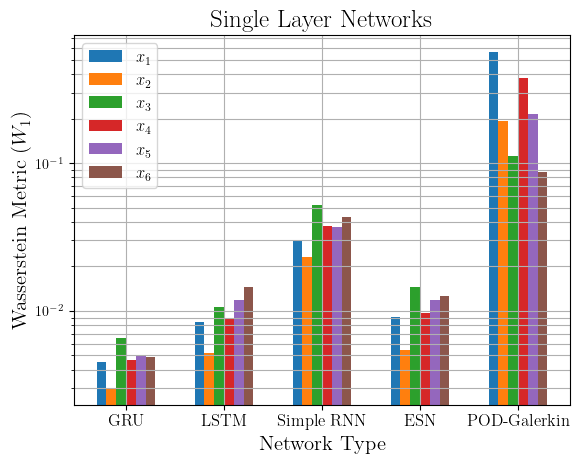

In [10]:
width = 0.1

labels = [r'$x_1$', r'$x_2$', r'$x_3$', r'$x_4$', r'$x_5$', r'$x_6$']
ind = np.arange(0, len(idx_plot))

W1_global = []
for j in range(len(idx_plot)):
    with open(gru_dname_list[j] + '/plots/longterm--pdf--W1.txt', 'r') as f:
        s = f.readlines()
        
    W1 = []
    for i in range(-6, 0):
        temp_ = s[i].split(':')[1].strip().split(',')
        temp_ = [float(elem.strip()) for elem in temp_]
        W1.append(temp_[idx_plot[j][0]])

    for i in range(6):
        if j > 0:
            labels[i] = '__nolabel__'
        plt.bar(
            ind[j]+0.5*width+(i-int(0.5*len(W1)))*width,
            W1[i],
            label=labels[i],
            width=width,
            color='C{}'.format(i)
        )
    W1_global.append(W1)

plt.grid(True, which='both')
plt.legend(**legend_kwargs)

plt.ylabel(r'Wasserstein Metric ($W_1$)', **ylabel_kwargs)
# plt.xlabel(r'AR Training Steps', **xlabel_kwargs)

# xticks_pos = ind
# xticks_labels = ['Teacher\nforced']
# xticks_labels.extend(['{:d}'.format(elem) for elem in num_outsteps_esn[1:]])

# plt.xticks(xticks_pos, xticks_labels, **legend_kwargs)

plt.xticks(
    np.arange(gru_ph_arr_list_global.shape[0]),
    ['GRU', 'LSTM', 'Simple RNN', 'ESN', 'POD-Galerkin'],
#     ('Teacher\nforced',) + tuple([str(elem) for elem in esn_numoutsteps[1:]]),
    **xticks_kwargs
)
plt.xlabel('Network Type', **xlabel_kwargs)
plt.title('Single Layer Networks', **title_kwargs)

plt.gca().set_yscale('log')

plt.savefig(plot_dir+'/W1_distance.pdf', dpi=300, bbox_inches='tight')
plt.show()

with open(plot_dir+'/W1_distance.txt', 'w') as f:
    for elem in W1_global:
        s = ', '.join(['{:.4E}'.format(elem2) for elem2 in elem])
        s += '\n'
        f.write(s)

In [10]:

    
# plot_arr = [gru_ph_arr_list_global[i][idx_plot[i][0]] for i in range(len(idx_plot))]
# #     plot_arr = gru_ph_arr_list_global.transpose(1,0,2)[idx_plot[:][0]].transpose(1,0,2)[:,0]
#     yticks_min = 0
#     yticks_max = int(np.max(plot_arr)+1)
#     yticks_pos = np.arange(yticks_min, yticks_max+1, 1)

#     # box_or_violin = 2 # 0 == box
#     #                   # 1 == violin
#     #                   # 2 == box with violin super-imposed
#     if box_or_violin == 0:
#         parts = plt.boxplot(
#             list(plot_arr),
#         )
#     elif box_or_violin == 1:
#         parts = plt.violinplot(
#             list(plot_arr),
#             showmedians=True
#         )
#     elif box_or_violin == 2:
#         parts = plt.violinplot(
#             list(plot_arr),
#         )
#         parts['cmaxes'].set(linewidth=0.)
#         parts['cmins'].set(linewidth=0.)
#         parts['cbars'].set(linewidth=0.)
#         # parts['medians'].set(linewidth=0.)
#         parts2 = plt.boxplot(
#             list(plot_arr),
#         )
    
#     plt.grid(True)
#     plt.xticks(
#         np.arange(gru_ph_arr_list_global.shape[0]) + 1,
#         ['GRU', 'LSTM', 'Simple RNN', 'ESN', 'POD-Galerkin'],
#     #     ('Teacher\nforced',) + tuple([str(elem) for elem in esn_numoutsteps[1:]]),
#         **xticks_kwargs
#     )
#     plt.yticks(yticks_pos, **yticks_kwargs)
#     plt.xlabel('Network Type', **xlabel_kwargs)
#     plt.ylabel('Prediction Horizon [LT]', **ylabel_kwargs)
#     plt.title('Single Layer Networks', **title_kwargs)

#     if box_or_violin == 0:
#         savefig_name = 'study03--boxplot.pdf'
#     elif box_or_violin == 1:
#         savefig_name = 'study03--violinplot.pdf'
#     elif box_or_violin == 2:
#         savefig_name = 'study03--boxandviolinplot.pdf'

#     plt.savefig(plot_dir+'/'+savefig_name, dpi=300, bbox_inches='tight')
#     plt.show()
#     plt.close()
    
# #     # plt.violinplot(
# #     #     list(gru_ph_arr_list_global[:, -1]),
# #     #     showmedians=True,
# #     # #     quantiles=[[0.25, 0.75] for i in range(gru_ph_arr_list_global.shape[0])],
# #     # )
# #     plt.boxplot(
# #         list(gru_ph_arr_list_global[:, -1]),
# #     #     showmedians=True,
# #     #     quantiles=[[0.25, 0.75] for i in range(gru_ph_arr_list_global.shape[0])],
# #     )
# #     plt.grid(True)
# #     plt.xticks(
# #         np.arange(gru_ph_arr_list_global.shape[0]) + 1,
# #         ['20', '50', '80'],
# #     #     ('Teacher\nforced',) + tuple([str(elem) for elem in esn_numoutsteps[1:]]),
# #         **xticks_kwargs
# #     )
# #     plt.yticks(**yticks_kwargs)
# #     plt.xlabel(r'$n^r \atop{^{(\mathrm{layer \ size} = n^{r} \times n^{ls})}}$', fontsize=20)#**xlabel_kwargs)
# #     plt.ylabel('Prediction Horizon [LT]', **ylabel_kwargs)
# #     plt.title('GRU', **title_kwargs)

# #     plt.savefig(plot_dir+'/gru-study02--boxplot.pdf', dpi=300, bbox_inches='tight')
# #     # plt.savefig(plot_dir+'/gru-study02--violinplot.pdf', dpi=300, bbox_inches='tight')
# #     plt.show()